This notebook contains figures that are used in the proposal

In [1]:
from scipy.io import netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import similarity_measures as sim
import calculations as calc
import comparing as comp
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Similarity between time series</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 104)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 1)

u_l30 = nc_l30.variables["u"]

qbo_singapore = calc.derive(u_l30[:,:,:,:], lon, lat, 0)

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


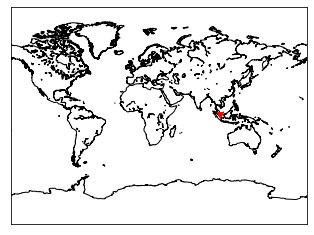

In [4]:
fig, ax = plt.subplots()
m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax)
m.drawcoastlines()
lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

#Draw reference point
x, y = m(104, 1)
m.scatter(x, y, marker="v", color="r", zorder=5)

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


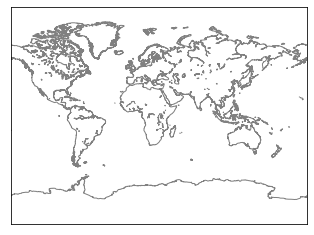

In [5]:
fig, ax = plt.subplots()
m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax)
m.drawcoastlines(color="gray")
lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

#Draw reference point
#x, y = m(104, 1)
#m.scatter(x, y, marker="v", color="r", zorder=5, s=80)

lon_point = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 50)
lat_point = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], -50)
#x, y = m(50, -50)
#m.scatter(x, y, marker="v", color="b", zorder=5, s=80)

In [6]:
random_point_series = calc.derive(u_l30[:36,:,:,:], lat_point, lon_point, 0)

Text(0.5, 1.0, 'Horizontal wind component at 30 hPa')

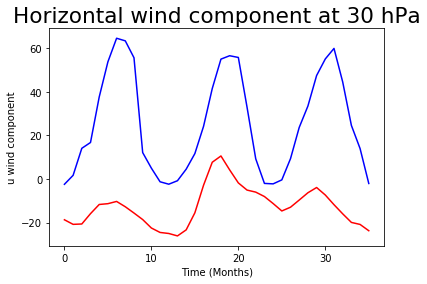

In [7]:
plt.plot(qbo_singapore[:36], label="Reference Point (Singapore)", c="r")
plt.plot(random_point_series, label="Random Point (-50N, 50E)", c="b")
plt.xlabel("Time (Months)")
plt.rcParams.update({'font.size': 18})
plt.ylabel("u wind component")
plt.title("Horizontal wind component at 30 hPa")

In [8]:
np.round(sim.pearson_correlation(qbo_singapore[:36], random_point_series), 3)

0.605

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:83: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


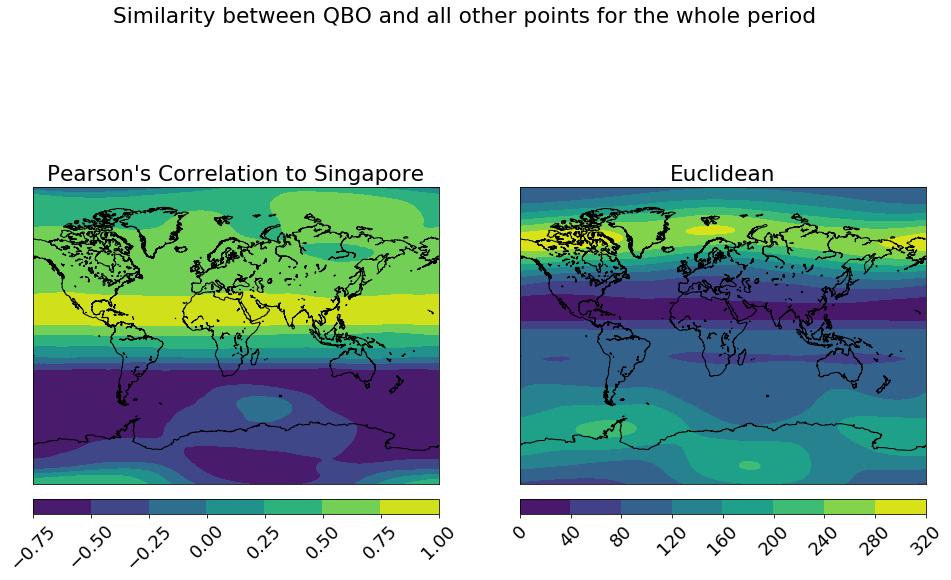

In [9]:
plt.rcParams.update({'font.size': 18})
plots.plot_similarities(u_l30[:36,:,:,:], qbo_singapore[:36], [sim.pearson_correlation, sim.euclidean_distance], ["Pearson's Correlation to Singapore", "Euclidean"], lambda x: x)

<h2>Lack of comparability</h2>

In [10]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [11]:
measures = [sim.pearson_correlation, sim.mutual_information, sim.manhattan_distance]

In [12]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Manhattan Distance"]

In [13]:
similarities = []
for i, measure in enumerate(measures):
    similarities.append(np.array(calc.calculate_series_similarity(u_l30, qbo_equator, 0, measure)))

n_measures = len(measures)

In [14]:
category = ["Similarities to QBO", "Values distribution", "Values vs. Pearson's Correlation"]

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


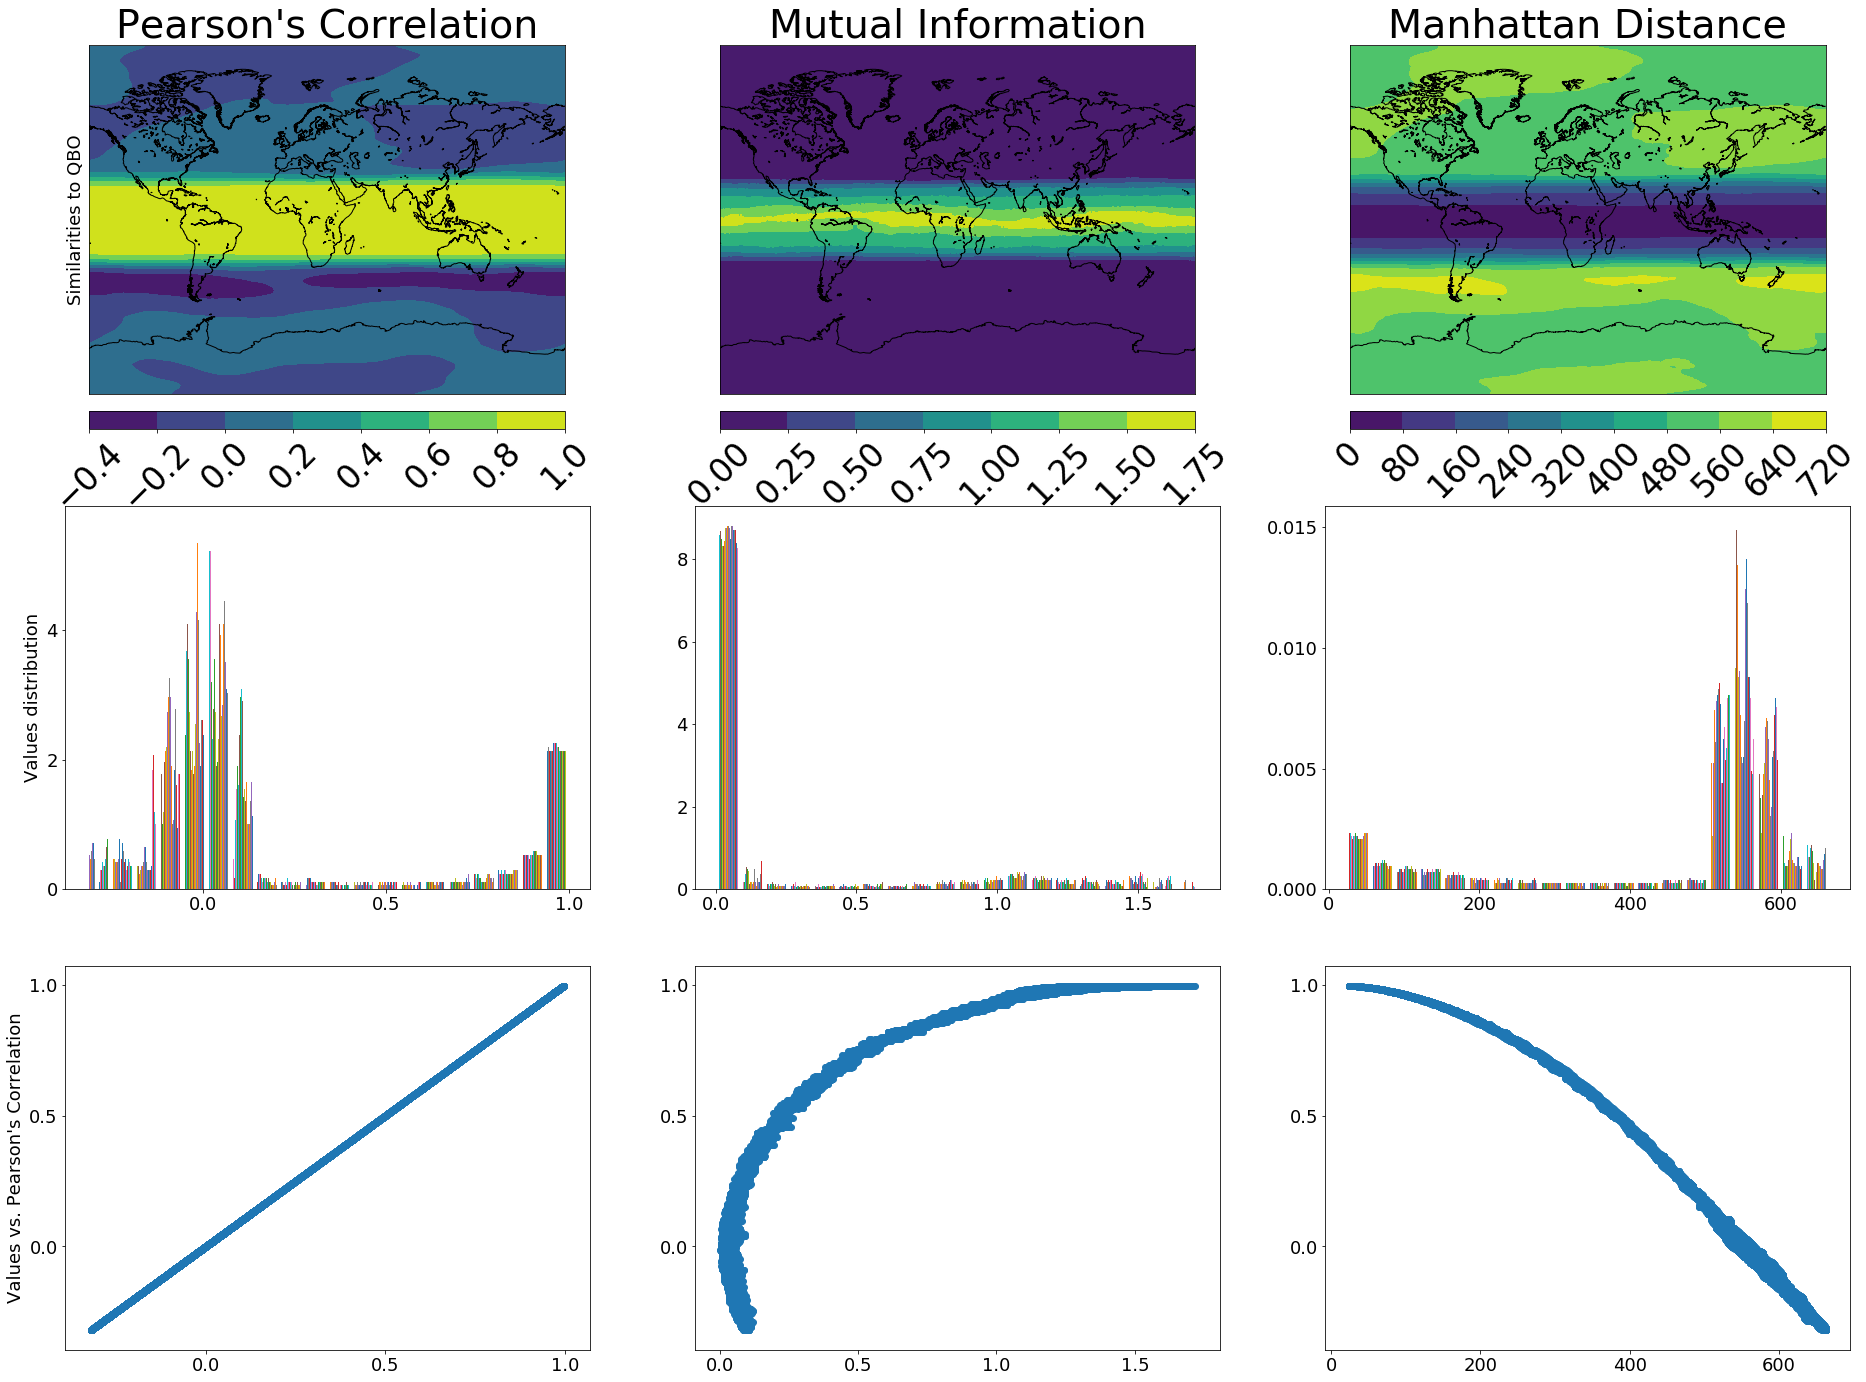

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=n_measures, figsize=(8 * 4, 8 * n_measures))
plt.rcParams.update({'font.size': 33})

for i, simi in enumerate(similarities):
    m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[0][i])
    m.drawcoastlines()
    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    #Draw similarity
    cs = m.contourf(x, y, simi)
    cbar = m.colorbar(cs, location='bottom', pad="5%")
    cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=45)
    
for i, simi in enumerate(similarities):
    ax[1][i].hist(simi, bins=20, histtype="bar", density=1)

for i, measure_i in enumerate(measures):
            ax[2][i].scatter(similarities[i], similarities[0])

for i, label in enumerate(measure_labels):
        ax[0][i].set_title(label)
        ax[i][0].set_ylabel(category[i], rotation=90)
plt.show()

<h2>Modular framework</h2>

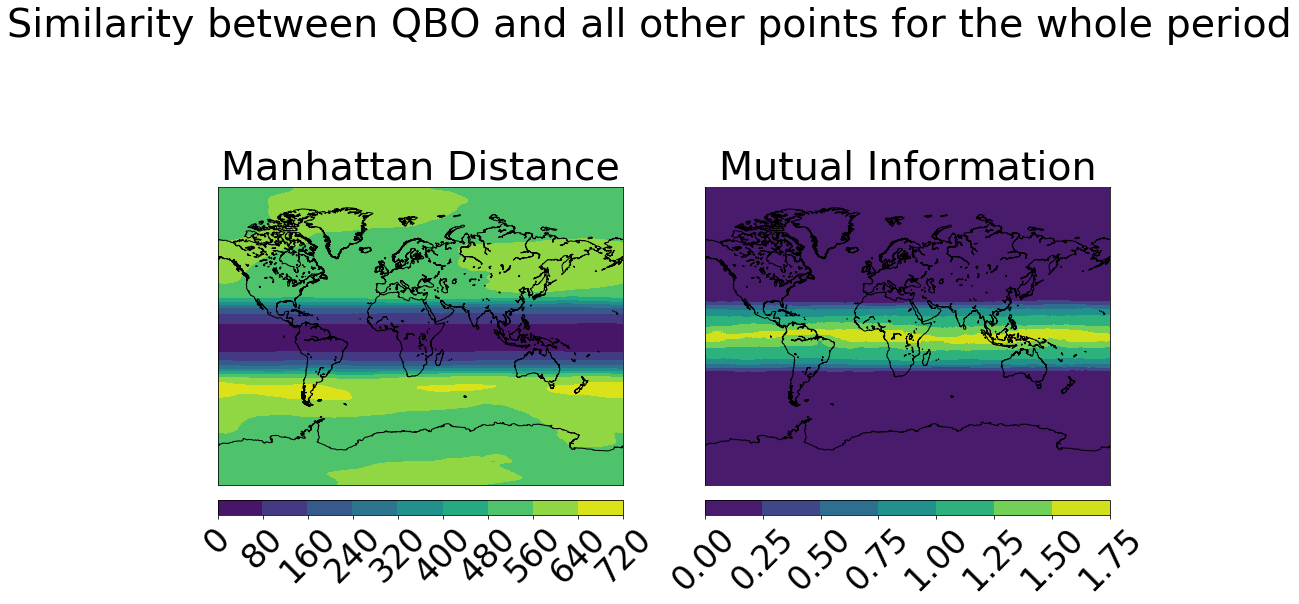

In [16]:
plots.plot_similarities(u_l30[:,:,:,:], qbo_equator, [sim.manhattan_distance, sim.mutual_information], ["Manhattan Distance", "Mutual Information"], lambda x: x)

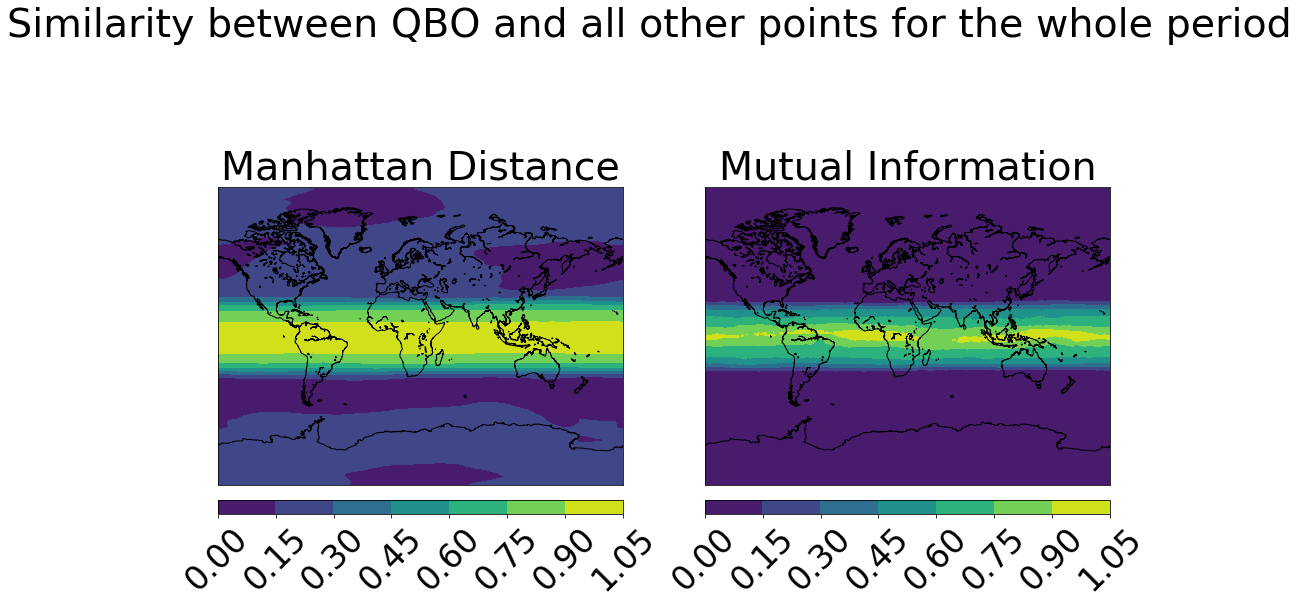

In [17]:
plots.plot_similarities(u_l30[:,:,:,:], qbo_equator, [comp.invert(sim.manhattan_distance), sim.mutual_information], ["Manhattan Distance", "Mutual Information"], comp.min_max_normalization)

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:284: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i][j])


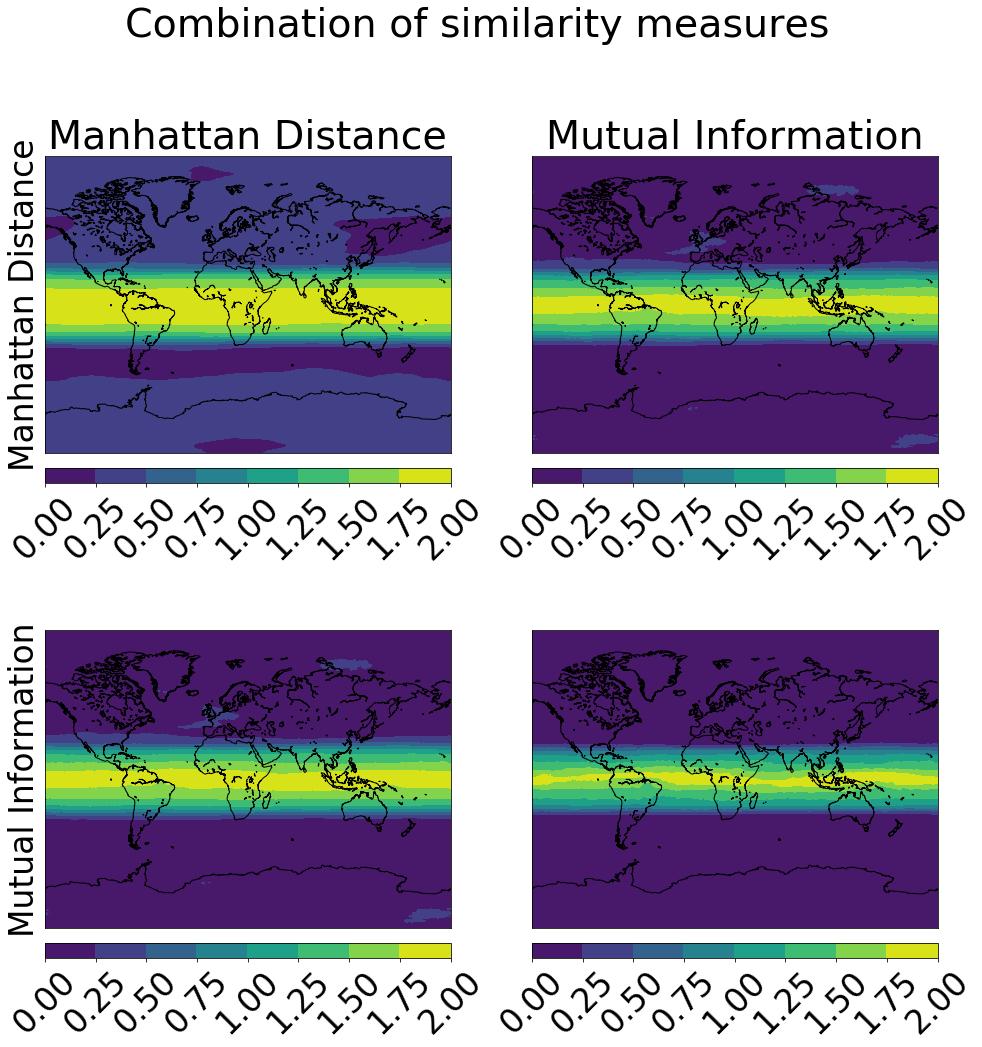

In [18]:
plots.plot_similarity_measures_combinations(u_l30[:,:,:,:], qbo_equator, (lambda x, y: x + y), [comp.invert(sim.manhattan_distance), sim.mutual_information], ["Manhattan Distance", "Mutual Information"], comp.min_max_normalization)

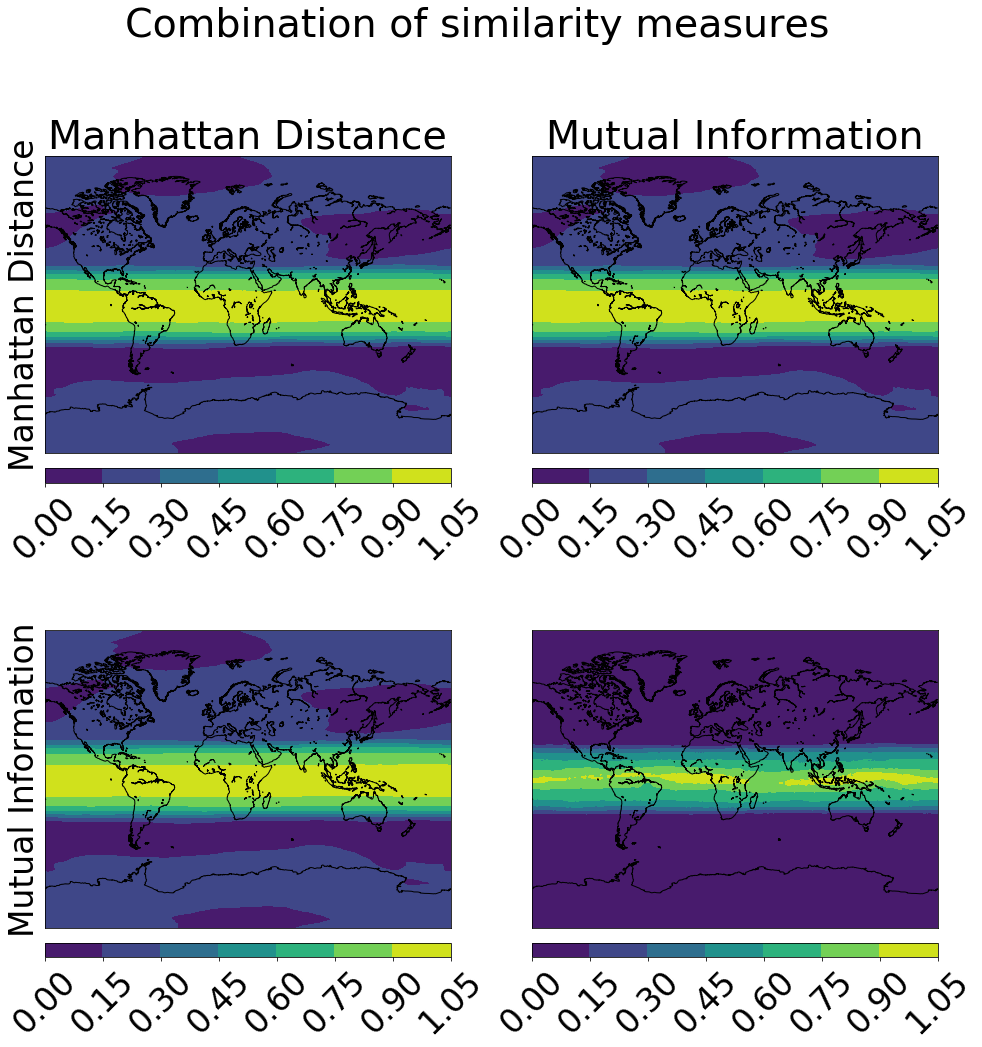

In [19]:
plots.plot_similarity_measures_combinations(u_l30[:,:,:,:], qbo_equator, np.maximum, [comp.invert(sim.manhattan_distance), sim.mutual_information], ["Manhattan Distance", "Mutual Information"], comp.min_max_normalization)